In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [26]:
import pandas as pd

def get_stock_data(normalized=0):
    url = "EDELWEISSNS.csv"
    col_names = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
    
    # Membaca file CSV
    stocks = pd.read_csv(url, header=0, names=col_names)
    df = pd.DataFrame(stocks)
    
    # Pastikan kolom 'Date' berbentuk string
    df['Date'] = df['Date'].astype(str)
    
    # Pastikan format tanggal sesuai dan pisahkan dengan expand=True
    date_split = df['Date'].str.split('-', expand=True)
    
    # Jika format sudah benar, pastikan ada 3 kolom hasil split
    if date_split.shape[1] == 3:
        df[['Year', 'Month', 'Day']] = date_split
    else:
        print("Warning: Format tanggal tidak sesuai")
    
    # Normalisasi Volume
    df["Volume"] = df["Volume"] / 10000
    
    return df


In [27]:
import pandas as pd

def get_stock_data(normalized=0):
    url = "EDELWEISSNS.csv"
    col_names = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
    
    # Membaca file CSV
    stocks = pd.read_csv(url, header=0, names=col_names)
    df = pd.DataFrame(stocks)
    
    # Pastikan kolom 'Date' berbentuk string
    df['Date'] = df['Date'].astype(str)
    
    # Konversi tanggal ke format standar dan abaikan error jika ada yang tidak bisa dikonversi
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')

    # Hapus baris dengan tanggal yang gagal dikonversi
    df = df.dropna(subset=['Date'])

    # Pisahkan tanggal dengan aman
    date_split = df['Date'].str.split('-', expand=True)

    # Pastikan hasil split memiliki 3 kolom sebelum menambahkan ke dataframe
    if date_split.shape[1] == 3:
        df[['Year', 'Month', 'Day']] = date_split
    else:
        print("Warning: Format tanggal tidak sesuai. Pastikan semua tanggal berformat YYYY-MM-DD.")
    
    # Normalisasi Volume
    df["Volume"] = df["Volume"].astype(float) / 10000
    
    return df


In [28]:
df = get_stock_data(0)


In [29]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2008-10-03,41.299999,41.685001,39.400002,40.525002,0.002930,185090.0,2008,10,03
1,2008-10-06,39.700001,40.799999,37.200001,39.564999,0.002860,204340.0,2008,10,06
2,2008-10-07,40.000000,40.599998,36.000000,36.119999,0.002611,128970.0,2008,10,07
3,2008-10-08,35.000000,44.400002,34.500000,40.880001,0.002955,700490.0,2008,10,08
4,2008-10-10,40.400002,40.400002,35.299999,37.910000,0.002741,367380.0,2008,10,10
...,...,...,...,...,...,...,...,...,...,...
2462,2018-09-25,218.000000,221.000000,208.500000,218.550003,0.021855,5014613.0,2018,09,25
2463,2018-09-26,221.500000,221.500000,210.100006,212.149994,0.021215,3303414.0,2018,09,26
2464,2018-09-27,213.199997,214.449997,185.199997,189.399994,0.018940,9492583.0,2018,09,27
2465,2018-09-28,191.399994,198.850006,181.000000,189.500000,0.018950,6458894.0,2018,09,28


In [30]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

            Date   Open     High         Low    Close    Volume  Adj Close  \
0     2008-10-03  0.413  0.41685   39.400002  0.40525  0.292964   185090.0   
1     2008-10-06  0.397  0.40800   37.200001  0.39565  0.286023   204340.0   
2     2008-10-07  0.400  0.40600   36.000000  0.36120  0.261119   128970.0   
3     2008-10-08  0.350  0.44400   34.500000  0.40880  0.295530   700490.0   
4     2008-10-10  0.404  0.40400   35.299999  0.37910  0.274059   367380.0   
...          ...    ...      ...         ...      ...       ...        ...   
2462  2018-09-25  2.180  2.21000  208.500000  2.18550  2.185500  5014613.0   
2463  2018-09-26  2.215  2.21500  210.100006  2.12150  2.121500  3303414.0   
2464  2018-09-27  2.132  2.14450  185.199997  1.89400  1.894000  9492583.0   
2465  2018-09-28  1.914  1.98850  181.000000  1.89500  1.895000  6458894.0   
2466  2018-10-01  1.890  1.90900  169.050003  1.87000  1.870000  6270237.0   

      Year Month Day  
0     2008    10  03  
1     2008    10 

/tmp/ipykernel_10404/3421202112.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High'][i] = 0
/tmp/ipykernel_10404/3421202112.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High'][i] = 0
/tmp/ipykernel_10404/3421202112.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High'][i] = 0
/tmp/ipykernel_10404/3421202112.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [31]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [32]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1973, 3)
y_train (1973, 1)
X_test (494, 3)
y_test (494, 1)


In [40]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'normal', activation = 'linear', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'linear'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

/home/kevinpnjt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.1859 - val_loss: 0.7753
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1553 - val_loss: 0.6048
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0931 - val_loss: 0.2978
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0240 - val_loss: 0.0462
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0063 - val_loss: 0.0416
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047 - val_loss: 0.0718
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0045 - val_loss: 0.0526
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - val_loss: 0.0479
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0035 - val_loss: 0.0469
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031 - val_loss: 0.0407


In [41]:
predictions = classifier.predict(X_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [42]:
predictions 

array([[0.9005957 ],
       [0.89708745],
       [0.8905569 ],
       [0.8969516 ],
       [0.8902519 ],
       [0.8857305 ],
       [0.8743385 ],
       [0.87560076],
       [0.87726134],
       [0.90949184],
       [0.93017   ],
       [0.91804326],
       [0.91458595],
       [0.91152525],
       [0.91216046],
       [0.9076996 ],
       [0.8997457 ],
       [0.9031507 ],
       [0.8842184 ],
       [0.8704601 ],
       [0.8509193 ],
       [0.84515005],
       [0.8402986 ],
       [0.7958499 ],
       [0.8298415 ],
       [0.8107474 ],
       [0.76774687],
       [0.7421522 ],
       [0.7341158 ],
       [0.7299336 ],
       [0.7245582 ],
       [0.7178278 ],
       [0.734703  ],
       [0.7267998 ],
       [0.7354838 ],
       [0.7706032 ],
       [0.7842921 ],
       [0.78583276],
       [0.77715117],
       [0.7601709 ],
       [0.7462143 ],
       [0.74720025],
       [0.74342644],
       [0.74279344],
       [0.74494386],
       [0.73854715],
       [0.7294121 ],
       [0.725

In [44]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.07 RMSE)
Test Score: 0.61 MSE (0.78 RMSE)


In [45]:
from sklearn.metrics import mean_absolute_percentage_error
trainScore = mean_absolute_percentage_error(Y_train, classifier.predict(X_train))
print('Train Score: %.2f MAPE' % trainScore)
testScore = mean_absolute_percentage_error(Y_test, classifier.predict(X_test))
print('Test Score: %.2f MAPE' % testScore)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Train Score: 3503457939009.79 MAPE
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Score: 0.31 MAPE


In [38]:
print("Jumlah nol di Y_train:", (Y_train == 0).sum())
print("Jumlah nol di Y_test:", (Y_test == 0).sum())


Jumlah nol di Y_train: Close    8
dtype: int64
Jumlah nol di Y_test: Close    0
dtype: int64


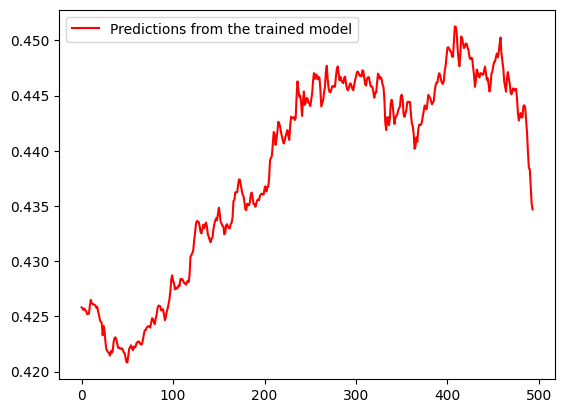

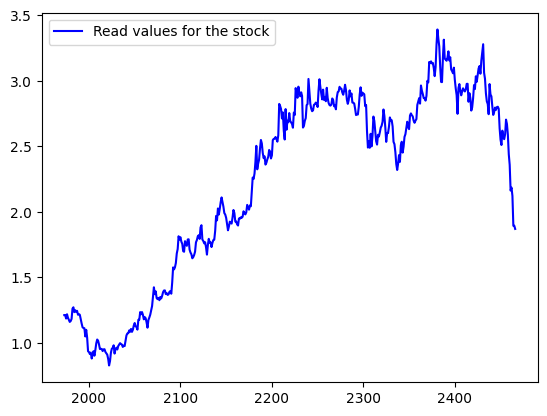

In [39]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()